<h1> Heap Sort</h1>

***
<i> 
We extend the concept of linked data structures to structure containing nodes with more than one self-referenced field. A binary tree is made of nodes, where each node contains a "left" reference, a "right" reference, and a data element. The topmost node in the tree is called the root.
Every node (excluding a root) in a tree is connected by a directed edge from exactly one other node. This node is called a parent. On the other hand, each node can be connected to arbitrary number of nodes, called children. Nodes with no children are called leaves, or external nodes. Nodes which are not leaves are called internal nodes. Nodes with the same parent are called siblings.</i>

-https://www.andrew.cmu.edu/course/15-121/lectures/Trees/trees.html

Heap sort is a comparison based sorting algorithm. It uses the heap data structure to sort the array. While it may be slightly slower than a quicksort algorithm it is favoured by many because it has a preferable worst case scenario runtime being O(n log n).

Heap sort divides the array into two distinct regions <i>Sorted</i> and <i>Unsorted</i>. At first every element is in the unsorted region and the sorted region is left empty. The largest elemnt is the chosen and added to the sorted region. The elements in the unsorted region can be visualized as a binary tree

***
<h3> Binary Tree </h3>

<i>
We extend the concept of linked data structures to structure containing nodes with more than one self-referenced field. A binary tree is made of nodes, where each node contains a "left" reference, a "right" reference, and a data element. The topmost node in the tree is called the root.
Every node (excluding a root) in a tree is connected by a directed edge from exactly one other node. This node is called a parent. On the other hand, each node can be connected to arbitrary number of nodes, called children. Nodes with no children are called leaves, or external nodes. Nodes which are not leaves are called internal nodes. Nodes with the same parent are called siblings.</i>

-https://www.andrew.cmu.edu/course/15-121/lectures/Trees/trees.html

A binary tree is a <i>Tree Data Structure</i> where every node has a maximum of two children which are usually refered to as the <i>Left Child</i> and the <i>Right Child</i>. The first(top-most) node is given the title <i>Root Node</i> and a node without any children is called a <i>Leaf Node</i>.

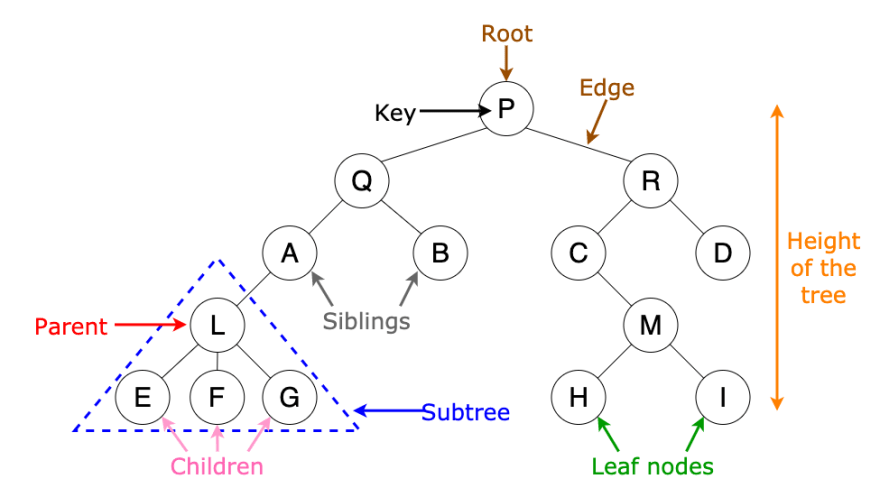

-"https://dev.to/christinamcmahon/understanding-binary-search-trees-4d90"

A complete binary tree is a binary where all the levels are filled except possibly the bottom-most one, which is filled from the left.

<br>

<h2> Heap Data Structure</h2>

***

A heap is a special type of complete binary tree. This means that all the children of any given node must be greater or smaller then their parent node. If all the nodes are greater then their parent it is called a <i>Min-Heap</i> where as if all the children are lower then their parent its is called a <i>Max-Heap</i>

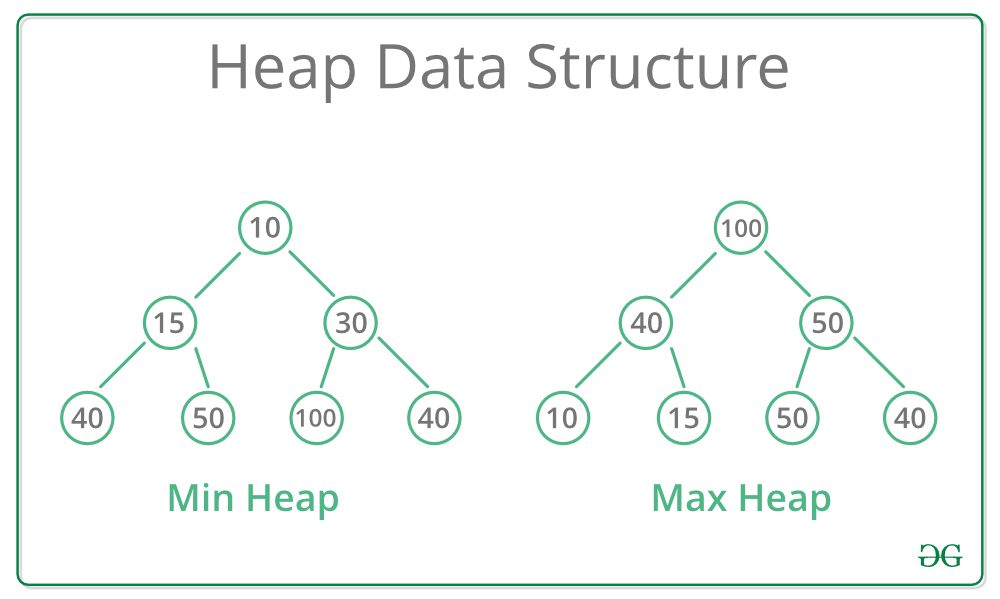

-"https://www.geeksforgeeks.org/heap-data-structure/"

<br>
<h1> Explaing the Heap Sort Algorithm</h1>

***


The first step in the heap sort algoritm is to sort the array in ascending order. We should visualise our array as a binary tree and create a max-heap.

Next we use the ellements in the unsorted region of the array to <i>Heapify</i> the tree. <b>Heapify</b> is the name of the process of creating heap data structures from our binary tree. It is essentail for the creation of the Max/Min-Heaps shown earlier.

When the heap has been created, the root element will be removed from the heap and then added to the sorted region of the array. Since we are removing the root element from a max-heap, this ensures that we will obtain the largest element from the unsorted region every time an element is removed

We repeat this sequence over and over again until every element has been taken from the unsorted region and placed into the sorted region

<h1>Time Complexity of Heap Sort</h1>

***

The height of a complete binary tree (the largest number of edges from the root to the most distant leaf node) is logn due to there only being at most two children for each node. With only a maximum of two children the number of nodes will be roughly equal to half of the number of nodes present in the following level. This means that the height of a binary tree is almost equal to log2(n).

So for example if the number of nodes doubles, the tree will only increase by one level. This results in the complexity of the heapify() function to be nearly equal to O(logn).

So in the worst scenario the time complexity of the heap sort algorithm is O(nlogn).

<h1>Space Complexity of Heap Sort</h1>

***



The space complexity of the heap sort algorithm is O(1). This is due to us having used a fixed number of variables, and we do not need any extra memory space apart from the loop variables,auxiliary variables including temp, index and n. It means even with many elements we ont have to use any extra variables.

<br>
<h1>Implementing heapsort in Python</h1>

***

In [3]:
def siftDown(L, parent, end):
    """L[parent:end+1] should almost be a max heap.
       siftDown repairs it so that it is one."""
    
    # Keep track of the number of comparisons.
    no_comparisons = 0
    
    # While parent is actually a parent (has at least a left child).
    while 2*parent + 1 <= end:
        # The indices of the children of parent.
        lchild = 2 * parent + 1
        rchild = 2 * parent + 2
        
        # Assume the parent is larger than the children.
        swap = parent
        # Is the parent smaller than the left child?
        if L[swap] < L[lchild]:
            # Then swap is set to index of left child.
            swap = lchild
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
        # Check if right child exists and is smaller than L[swap].
        if rchild <= end and L[swap] < L[rchild]:
            # Then swap is set to index of right child.
            swap = rchild
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
        # We have a max heap if the parent is bigger than the children.
        if swap == parent:
            break 
        else:
            # Swap the parent with the bigger child.
            L[parent], L[swap] = L[swap], L[parent]
            # Set parent to bigger child's index.
            parent = swap
    
    # Return the number of comparisons.
    return no_comparisons

In [4]:
def heapsort(L):
    """Sorts the list L in-place using Heap Sort."""
    
    # Keep track of the number of comparisons.
    no_comparisons = 0
    
    # Turn L into a max heap.
    # Index of the last element.
    last_element = len(L) - 1
    # Find the last parent.
    last_parent = (last_element - 1) // 2
    # Loop backwards through all parents.
    for parent in range(last_parent, -1, -1):
        # Sift down.
        no_comparisons = no_comparisons + siftDown(L, parent, last_element)

    # Segregate the list L into two parts:
    #   1. L[:end] is a max heap
    #   2. Each element beyond end is greater than everything before it.
    # While there are still elements in the heap.
    for end in range(last_element, 0, -1):
        # Swap the element at index 0 with the element at index end.
        L[0], L[end] = L[end], L[0]
        # Fix the heap - the root is currently out of place.
        no_comparisons = no_comparisons + siftDown(L, 0, end - 1)
    
    # Return the number of comparisons.
    return no_comparisons

In [6]:
# The example list from the diagram above.
L = [15, 10, 36, 55, 3, 17, 9, 99, 64]
L

[15, 10, 36, 55, 3, 17, 9, 99, 64]

In [7]:
# Show heap sort working.
heapsort(L)
L

[3, 9, 10, 15, 17, 36, 55, 64, 99]

<br>
<h1>Bubble Sort</h1>

***

Bubble Sort is a simple sorting algorithm. It works by repeatedly swapping the adjacent elements if they are in the wrong order. It is fine for small data sets but should not be used for large data sets sint in the worst case scenario it has a high time complexity.

<h2>How bubble sort works</h2>

We start at the first index in the array, we compare the first element to the second. If we are trying to arrange the elements in ascending order we want to see if the first element is larger then the second

If the first is larger they two elements are swapped if not they stay where they are.

We then repeat this process for the second and third elemets.

This is repeated for every element in the array

The array is sorted when every one of the unsorted elements are in their correct positions.

<h2>Time Complexity of Bubble Sort</h2>

The time complexity of bubble sort depends on how we want the array to be sorted and the way the array is sorted before the algorithm 

The best case scenario for bubble sort is if the array is already sorted so there is no need to do any sorting ourselves. In this scenario our time complexity is 0(n)

The worst case scenario is when the whole array needs to be sorted, in this case the time complexity is O($ n^2 $)

<h2>Space Complexity of Bubble Sort</h2>

Because we have to use an extra variable for swapping elements in bubble sort it has a space complexity 0(1)

<h1>Implementation of Bubble Sort</h1>

***

In [2]:
# Import a module from the standard library
import random

In [3]:
#Create a list of integers
L = list(range(1,11))
L

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
#Shuffle the list
random.shuffle(L)

In [5]:
#The list is shuffled
L

[9, 7, 4, 1, 5, 10, 2, 6, 8, 3]

In [6]:
# Bubble sort as a function

def bubble_sort(L):
    #Keep track of number of comparisions
    no_comparisons = 0
    for j in range(len(L) -1):
        #Keep track of swaps
        swapped = False
        # Compare all elements that are side by side
        for i in range(len(L) - 1):
            # Compare the ith element with the (i+1)th
            if L[i] > L[i+1]:
                #Swap the elements
                L[i],L[i+1] = L[i+1],L[i]
                # Keep track of the swaps
                swapped = True
            # Add a comparison
            no_comparisons = no_comparisons + 1
        #Quit if we didnt make any swaps
        if not swapped:
            break
    # Return the number of comparisons made
    return no_comparisons

In [9]:
# Show bubble sort working.
bubble_sort(L)
L

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]